# Exercise 3 - Dummy Variables

Just because we are solving a regression problem with continuous data it does not mean we cant integrate some categorical variables into our model.  These particular categorical variables, known as *Dummy Variables* are constructed from the continuous values in our dataset.  In this example we are going to create two categorical variables, one indicating if the year is greater than 1960 and one if the year is greater than 1940.  These two years were chosen as limits for creating the dummy variables because of the shape of the 15 year moving average.  As discussed there seems to be the start of an increasing trend around 1960 and 1940 was sellected as this is the approximate end of the early plateau.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

Reload the data from the previous exercise

In [2]:
df = pd.read_csv('synth_temp.csv')
df = df.loc[df.Year > 1901]
df_group_year = df.groupby('Year').agg(np.mean)

# Moving average
window = 10
rolling = df_group_year.AverageTemperature.rolling(window).mean();

df_group_year['Year'] = df_group_year.index

model = LinearRegression()

In [3]:
df_group_year['Gt_1960'] = [0 if year < 1960 else 10 for year in df_group_year.Year] # Dummy Variable - greater than 1960
df_group_year.head(n=2)

,AverageTemperature,Year,Gt_1960
Year,,,
1902,17.438122,1902,0
1903,17.375456,1903,0


In [4]:
df_group_year['Gt_1945'] = [0 if year < 1945 else 10 for year in df_group_year.Year]# Dummy Variable - greater than 1945
df_group_year.head(n=2)

,AverageTemperature,Year,Gt_1960,Gt_1945
Year,,,,
1902,17.438122,1902,0,0
1903,17.375456,1903,0,0


In [5]:
df_group_year.tail(n=2)

,AverageTemperature,Year,Gt_1960,Gt_1945
Year,,,,
2009,19.884571,2009,10,10
2010,19.903760,2010,10,10


In [6]:
# Note the year values need to be provided as an N x 1 array
model.fit(df_group_year[['Year', 'Gt_1960', 'Gt_1945']], df_group_year.AverageTemperature)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
# Note the year values need to be provided as an N x 1 array
r2 = model.score(df_group_year[['Year', 'Gt_1960', 'Gt_1945']], df_group_year.AverageTemperature)
print(f'r2 score = {r2:0.4f}')

r2 score = 0.9128


In [8]:
# Use linspace to get a range of values, in 20 yr increments
x = np.linspace(df_group_year['Year'].min(), df_group_year['Year'].max(), 20)
x

array([1902.        , 1907.68421053, 1913.36842105, 1919.05263158,
       1924.73684211, 1930.42105263, 1936.10526316, 1941.78947368,
       1947.47368421, 1953.15789474, 1958.84210526, 1964.52631579,
       1970.21052632, 1975.89473684, 1981.57894737, 1987.26315789,
       1992.94736842, 1998.63157895, 2004.31578947, 2010.        ])

In [9]:
trend_x = np.zeros((20, 3))
trend_x[:,0] = x # Assign to the first column
trend_x[:,1] = [10 if _x > 1960 else 0 for _x in x] # Assign to the second column
trend_x[:,2] = [10 if _x > 1945 else 0 for _x in x] # Assign to the third column 
trend_x

array([[1902.        ,    0.        ,    0.        ],
       [1907.68421053,    0.        ,    0.        ],
       [1913.36842105,    0.        ,    0.        ],
       [1919.05263158,    0.        ,    0.        ],
       [1924.73684211,    0.        ,    0.        ],
       [1930.42105263,    0.        ,    0.        ],
       [1936.10526316,    0.        ,    0.        ],
       [1941.78947368,    0.        ,    0.        ],
       [1947.47368421,    0.        ,   10.        ],
       [1953.15789474,    0.        ,   10.        ],
       [1958.84210526,    0.        ,   10.        ],
       [1964.52631579,   10.        ,   10.        ],
       [1970.21052632,   10.        ,   10.        ],
       [1975.89473684,   10.        ,   10.        ],
       [1981.57894737,   10.        ,   10.        ],
       [1987.26315789,   10.        ,   10.        ],
       [1992.94736842,   10.        ,   10.        ],
       [1998.63157895,   10.        ,   10.        ],
       [2004.31578947,   10.

In [10]:
trend_y = model.predict(trend_x)
trend_y

array([17.06063456, 17.17806179, 17.29548901, 17.41291624, 17.53034347,
       17.6477707 , 17.76519793, 17.88262516, 17.57196656, 17.68939379,
       17.80682102, 18.51649321, 18.63392043, 18.75134766, 18.86877489,
       18.98620212, 19.10362935, 19.22105658, 19.33848381, 19.45591104])

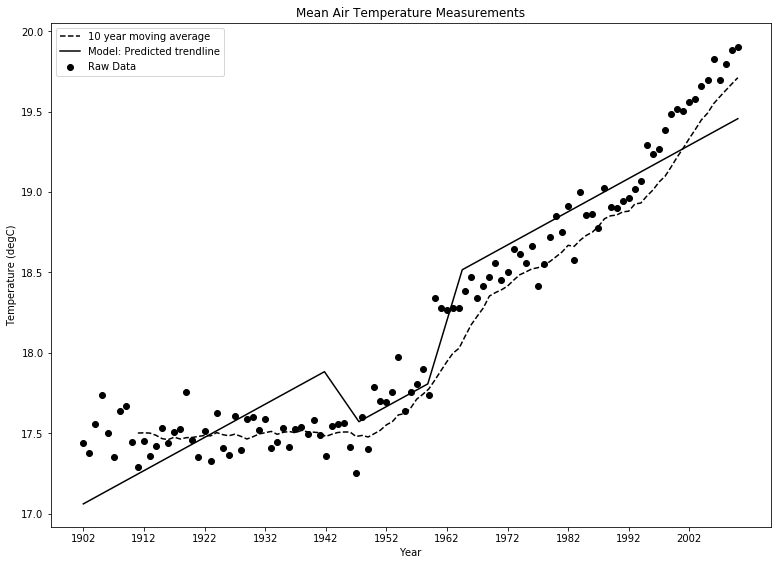

In [11]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);

# Temp measurements
ax.scatter(df_group_year.index, df_group_year.AverageTemperature, label='Raw Data', c='k');
ax.plot(df_group_year.index, rolling, c='k', linestyle='--', label=f'{window} year moving average');
ax.plot(trend_x[:,0], trend_y, c='k', label='Model: Predicted trendline')

ax.set_title('Mean Air Temperature Measurements')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (degC)')
ax.set_xticks(range(df_group_year.index.min(), df_group_year.index.max(), 10))
ax.legend();